<a href="https://colab.research.google.com/github/areumham/tiny_python_projects/blob/master/model_2_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
import os

# 구글 드라이브 마운트
drive.mount('/content/drive')

# 구글 드라이브에서 가져올 폴더의 경로 설정
folder_path = '/content/drive/MyDrive/img_align_celeba'

# 폴더 내의 파일 및 폴더 목록 가져오기
file_list = os.listdir(folder_path)

# 파일 및 폴더 목록 출력
print("Items in the folder:")
for item in file_list:
    item_path = os.path.join(folder_path, item)
    if os.path.isdir(item_path):
        print(f"Folder: {item}")
    else:
        print(f"File: {item}")

Mounted at /content/drive
Items in the folder:
File: 002939.jpg
File: 002937.jpg
File: 002923.jpg
File: 002926.jpg
File: 002927.jpg
File: 002925.jpg
File: 002933.jpg
File: 002940.jpg
File: 002936.jpg
File: 002934.jpg
File: 002945.jpg
File: 002955.jpg
File: 002954.jpg
File: 002951.jpg
File: 002946.jpg
File: 002956.jpg
File: 002952.jpg
File: 002947.jpg
File: 002958.jpg
File: 002953.jpg
File: 002950.jpg
File: 002942.jpg
File: 002949.jpg
File: 002948.jpg
File: 002957.jpg
File: 002944.jpg
File: 002941.jpg
File: 002943.jpg
File: 002959.jpg
File: 002965.jpg
File: 002969.jpg
File: 002962.jpg
File: 002977.jpg
File: 002972.jpg
File: 002961.jpg
File: 002976.jpg
File: 002966.jpg
File: 002973.jpg
File: 002964.jpg
File: 002968.jpg
File: 002960.jpg
File: 002974.jpg
File: 002971.jpg
File: 002967.jpg
File: 002963.jpg
File: 002975.jpg
File: 002978.jpg
File: 002970.jpg
File: 002984.jpg
File: 002994.jpg
File: 002981.jpg
File: 002991.jpg
File: 002988.jpg
File: 002989.jpg
File: 002996.jpg
File: 002998.jpg
F

In [ ]:
import warnings
warnings.filterwarnings('ignore')

import os
import glob
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from numpy import zeros,ones
from numpy.random import randn, randint
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import Dense,Conv2D,Conv2DTranspose,LeakyReLU
from keras.layers import BatchNormalization,Dropout,Reshape,Flatten

In [ ]:
import os
import glob
import numpy as np
from PIL import Image

#디렉토리 경로 지정
dataset_dir ='/content/drive/MyDrive/img_align_celeba'

#glob.glob() 함수를 사용하여 데이서텟 디렉토리 안에 있는 .jpg 확장자 파일 경로
#image_paths 리스트에 저장
image_paths = glob.glob(os.path.join(dataset_dir, "*.jpg"))

#필요한 만큼의 이미지만 선택(본인은 100장)
image_paths = image_paths[:3801]

#이미지 파일의 경로를 받아 해당이미지를 불러와 전처리(load_and_preprocess_real_images 함수)
def load_and_preprocess_real_images(image_path, target_size=(64, 64)):
    #이미지 열기
    img = Image.open(image_path)
    #이미지 자르기
    img = img.crop((0, 20, 178, 198))
    #이미지 크기 조정
    img = img.resize(target_size)
    #배열로 변환하여 정규
    image = np.array(img) / 127.5 - 1
    return image

#모든 이미지를 불러와서 전처리하여 데이터셋을 생성(리스트 컴프리헨션)=> 그리고 배열로 변환
dataset = np.array([load_and_preprocess_real_images(img_path) for img_path in image_paths])

# 데이터셋의 형태를 출력
print("Dataset shape:", dataset.shape)

Dataset shape: (3801, 64, 64, 3)


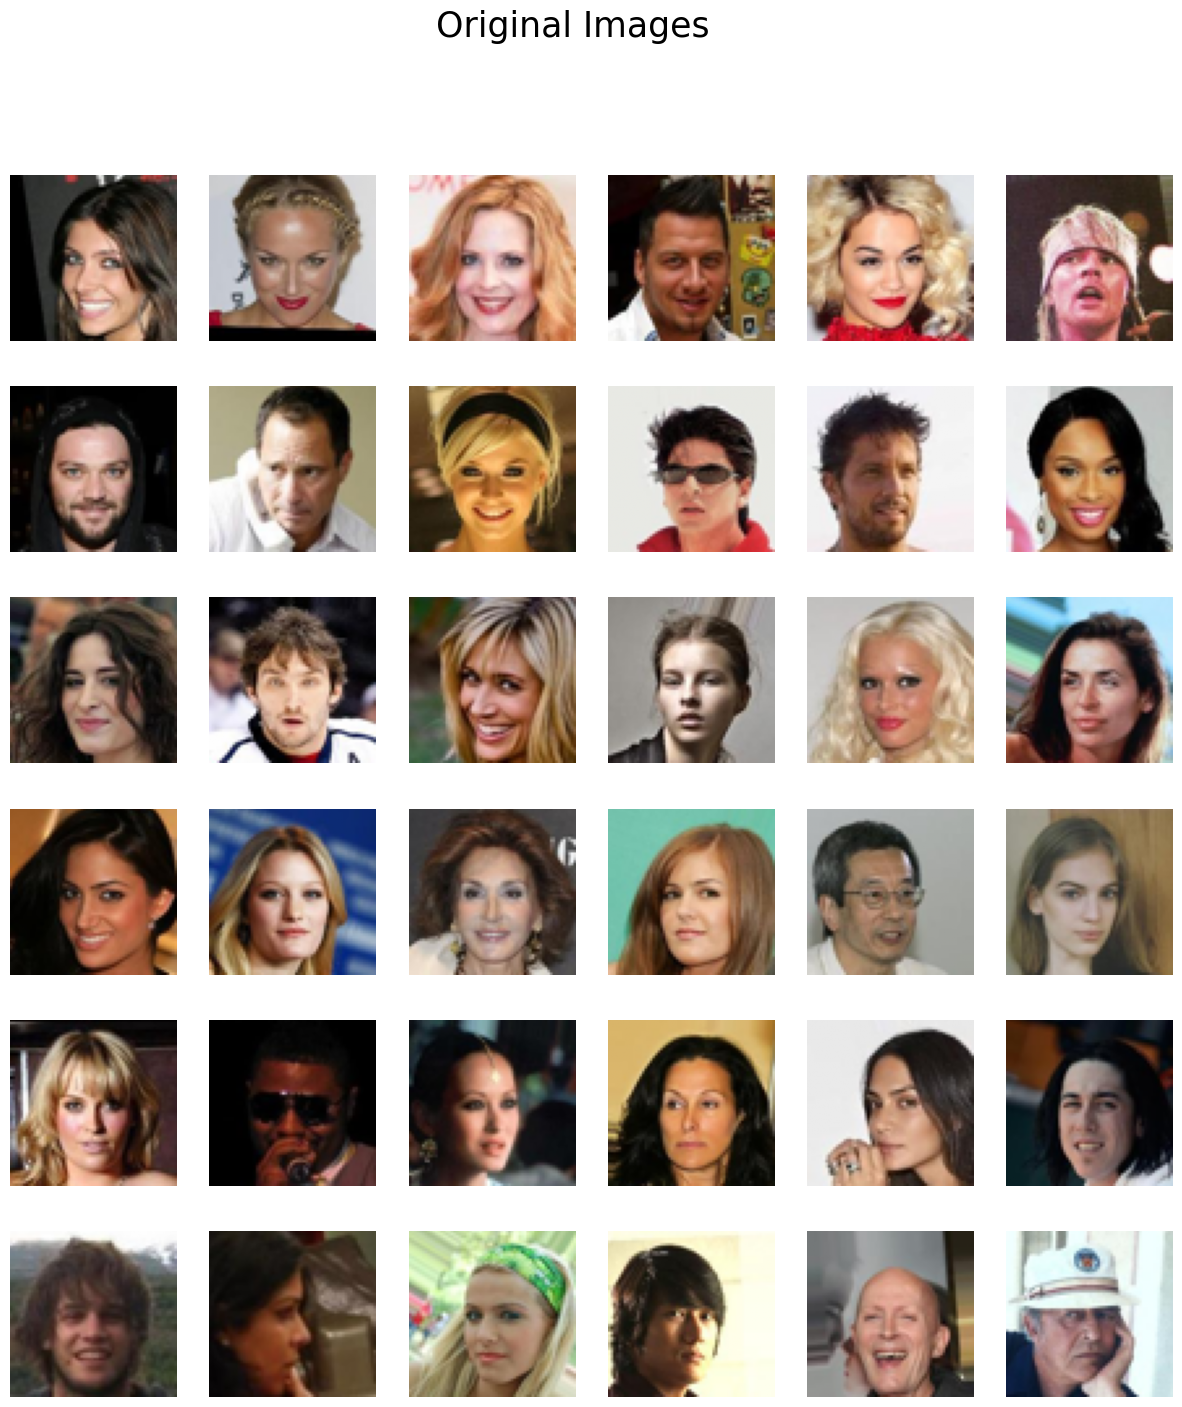

In [ ]:
fig, axes = plt.subplots(6, 6, figsize=(15, 16))
for i, ax in enumerate(axes.flat):
    img = dataset[i]
    img_rescaled = (img + 1) / 2
    ax.imshow(img_rescaled)
    ax.axis("off")
fig.suptitle("Original Images", fontsize=25)
plt.show()


In [ ]:
def build_discriminator(image_shape=(64, 64, 3)):
    model = Sequential()
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same", input_shape=image_shape))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(128, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(256, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(512, (3, 3), strides=(2,2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation="sigmoid"))
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

discriminator = build_discriminator()
discriminator.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 128)       3584      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 128)       147584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                                 
 conv2d_2 (Conv2D)           (None, 8, 8, 256)         295168    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 8, 8, 256)         0         
                                                                 
 conv2d_3 (Conv2D)           (None, 4, 4, 256)         5

In [ ]:
def build_generator(latent_dim, channels=3):
    model = Sequential()
    model.add(Dense(16 * 16 * 128, input_dim=latent_dim))
    model.add(LeakyReLU(0.2))
    model.add(Reshape((16, 16, 128)))
    model.add(Conv2DTranspose(128, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(128, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(2, 2), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2DTranspose(64, (4, 4), strides=(1, 1), padding="same"))
    model.add(LeakyReLU(0.2))
    model.add(Conv2D(channels, (8, 8), activation='tanh', padding="same"))
    return model

In [ ]:
def build_gan(generator, discriminator):
    discriminator.trainable = False
    model = Sequential()
    model.add(generator)
    model.add(discriminator)
    optimizer = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss="binary_crossentropy", optimizer=optimizer, metrics=["accuracy"])
    return model

In [ ]:
def generate_real_samples(dataset, n_samples):
    idx = np.random.randint(0, dataset.shape[0], n_samples)
    X = dataset[idx]
    y = np.ones((n_samples, 1))
    return X, y


In [ ]:
def generate_fake_samples(generator, noise_dim, n_samples):
    noise = np.random.randn(n_samples, noise_dim)
    X = generator.predict(noise)
    y = np.zeros((n_samples, 1))
    return X, y

In [ ]:
def generate_noise_samples(n_samples, noise_dim):
    return np.random.randn(n_samples, noise_dim)


In [ ]:
def plot_generated_images(epoch, generator, num_samples=6, noise_dim=100, figsize=(15, 3)):
    X_noise = generate_noise_samples(num_samples, noise_dim)
    X = generator.predict(X_noise, verbose=0)
    X = (X + 1) / 2
    fig, axes = plt.subplots(1, num_samples, figsize=figsize)
    for i in range(num_samples):
        axes[i].imshow(X[i])
        axes[i].axis('off')
    fig.suptitle(f"Generated Images at Epoch {epoch+1}", fontsize=22)
    plt.tight_layout()
    plt.show()

2/2 [==============================] - 4s 2s/step
[Epoch: 1, Batch: 1] --> [Discriminator Loss: 0.688391, Discriminator Accuracy: 57.81%] [Generator Loss: 0.693107]
2/2 [==============================] - 3s 1s/step
[Epoch: 1, Batch: 2] --> [Discriminator Loss: 0.689372, Discriminator Accuracy: 47.66%] [Generator Loss: 0.692462]
2/2 [==============================] - 2s 1s/step
[Epoch: 1, Batch: 3] --> [Discriminator Loss: 0.690441, Discriminator Accuracy: 46.88%] [Generator Loss: 0.690424]
2/2 [==============================] - 2s 1s/step
[Epoch: 1, Batch: 4] --> [Discriminator Loss: 0.693006, Discriminator Accuracy: 46.09%] [Generator Loss: 0.684357]
2/2 [==============================] - 4s 2s/step
[Epoch: 1, Batch: 5] --> [Discriminator Loss: 0.699081, Discriminator Accuracy: 46.88%] [Generator Loss: 0.672630]
2/2 [==============================] - 2s 1s/step
[Epoch: 1, Batch: 6] --> [Discriminator Loss: 0.704159, Discriminator Accuracy: 46.88%] [Generator Loss: 0.664978]
2/2 [=====

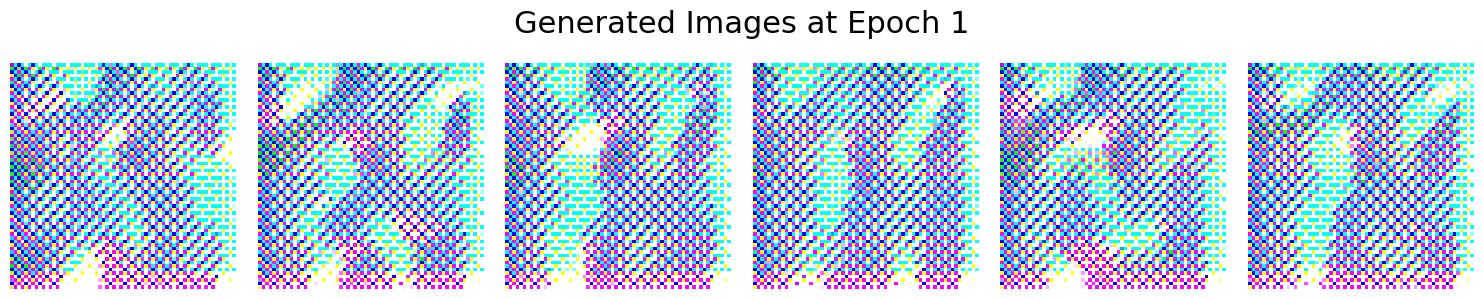


Epoch 1: saving model to /content/drive/MyDrive/checkpoints/gan_checkpoint_epoch_01.h5
2/2 [==============================] - 2s 1s/step
[Epoch: 2, Batch: 1] --> [Discriminator Loss: 0.726449, Discriminator Accuracy: 47.66%] [Generator Loss: 0.623946]
2/2 [==============================] - 4s 2s/step
[Epoch: 2, Batch: 2] --> [Discriminator Loss: 0.726311, Discriminator Accuracy: 44.53%] [Generator Loss: 0.621561]
2/2 [==============================] - 3s 1s/step
[Epoch: 2, Batch: 3] --> [Discriminator Loss: 0.725899, Discriminator Accuracy: 47.66%] [Generator Loss: 0.621137]
2/2 [==============================] - 2s 1s/step
[Epoch: 2, Batch: 4] --> [Discriminator Loss: 0.726463, Discriminator Accuracy: 48.44%] [Generator Loss: 0.621034]
2/2 [==============================] - 4s 2s/step
[Epoch: 2, Batch: 5] --> [Discriminator Loss: 0.725236, Discriminator Accuracy: 47.66%] [Generator Loss: 0.620070]
2/2 [==============================] - 2s 1s/step
[Epoch: 2, Batch: 6] --> [Discriminat

KeyboardInterrupt: 

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import Callback
import numpy as np
import os

# 사용자 정의 체크포인트 콜백 클래스
class CustomModelCheckpoint(Callback):
    def __init__(self, filepath, save_weights_only=True, verbose=1):
        super(CustomModelCheckpoint, self).__init__()
        self.filepath = filepath
        self.save_weights_only = save_weights_only
        self.verbose = verbose

    def on_epoch_end(self, epoch, logs=None):
        if logs is None:
            logs = {}

        file_path = self.filepath.format(epoch=epoch+1, **logs)
        if self.verbose > 0:
            print(f'\nEpoch {epoch+1}: saving model to {file_path}')

        if self.save_weights_only:
            self.model.save_weights(file_path)
        else:
            self.model.save(file_path)

# 체크포인트 경로 설정
checkpoint_path = "/content/drive/MyDrive/checkpoints/gan_checkpoint_epoch_{epoch:02d}.h5"
checkpoint_dir = os.path.dirname(checkpoint_path)

# 디렉토리가 존재하지 않는다면 생성
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)

def train(generator_model, discriminator_model, gan_model, dataset, noise_dimension,
          num_epochs=100, batch_size=128, display_frequency=10, patience=5, verbose=1):

    cp_callback = CustomModelCheckpoint(filepath=checkpoint_path,
                                        save_weights_only=True,
                                        verbose=1)

    cp_callback.set_model(gan_model)  # 수동으로 모델 설정

    saved_images_for_epochs = []
    batches_per_epoch = int(dataset.shape[0] / batch_size)
    half_batch_size = int(batch_size / 2)

    best_loss = np.inf
    epochs_without_improvement = 0

    for epoch in range(num_epochs):
        for batch in range(batches_per_epoch):
            real_images, real_labels = generate_real_samples(dataset, half_batch_size)
            dsr_loss_real, dsr_acc_real = discriminator_model.train_on_batch(real_images, real_labels)

            fake_images, fake_labels = generate_fake_samples(generator_model, noise_dimension, half_batch_size)
            dsr_loss_fake, dsr_acc_fake = discriminator_model.train_on_batch(fake_images, fake_labels)

            dsr_loss = 0.5 * (dsr_loss_real + dsr_loss_fake)
            dsr_acc = 0.5 * (dsr_acc_real + dsr_acc_fake)

            gen_noise = generate_noise_samples(batch_size, noise_dimension)
            gan_labels = np.ones((batch_size, 1))
            gan_loss = gan_model.train_on_batch(gen_noise, gan_labels)

            if verbose:
                print(f"[Epoch: {epoch+1}, Batch: {batch+1}] --> [Discriminator Loss: {dsr_loss:.6f}, Discriminator Accuracy: {100*dsr_acc:.2f}%] [Generator Loss: {gan_loss:.6f}]")

        if epoch % display_frequency == 0:
            plot_generated_images(epoch, generator_model)

        if gan_loss < best_loss:
            best_loss = gan_loss
            epochs_without_improvement = 0
        else:
            epochs_without_improvement += 1

        if epochs_without_improvement >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

        # 콜백 실행
        cp_callback.on_epoch_end(epoch, logs={'loss': gan_loss})

    return saved_images_for_epochs


# 모델 구성 및 학습
noise_dimension = 100
generator_model = build_generator(noise_dimension)
discriminator_model = build_discriminator()
gan_model = build_gan(generator_model, discriminator_model)
discriminator_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy', metrics=['accuracy'])
gan_model.compile(optimizer=tf.keras.optimizers.Adam(), loss='binary_crossentropy')

# 데이터셋 준비
dataset = np.random.rand(3801, 64, 64, 3)

saved_images = train(generator_model, discriminator_model, gan_model, dataset, noise_dimension,
                     num_epochs=251, batch_size=128, display_frequency=50, patience=5, verbose=1)
print("Training completed.")

#런타임 시간이 끝나 오류로 뜬거라 코드 오류는 아닙니다!